In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.interactive import printing
import hues

## Gradient descent simulation

In [2]:
# Making data
x = np.linspace(-1, 6, 200)
y = (x - 2.5) ** 2 - 1

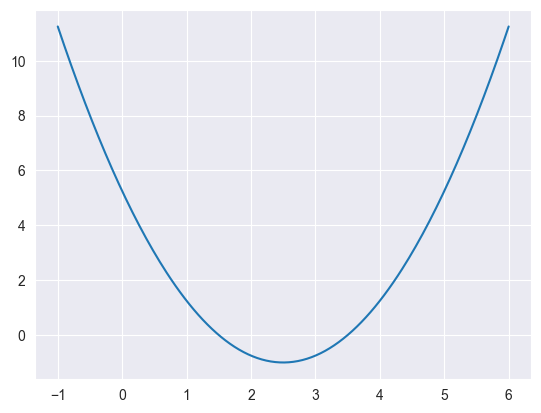

In [3]:
# Plot image and data visualization
plt.plot(x, y)
plt.show()

In [4]:
# f(x)
def get_der(theta):
    return 2 * (theta - 2.5)


# f'(x)
def get_y(theta):
    return (theta - 2.5) ** 2 - 1

19:41:51 - SUCCESS - theta is 2.4995140741236224, f(x) = -0.9999997638760426, the counter is 423.


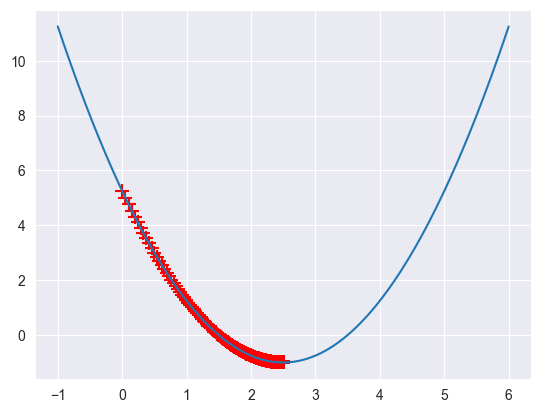

In [5]:
learn_rate, _theta, epsilon = 0.01, 0, 1e-8
theta_history = []
i = 0  # Counter
while True:
    i += 1
    gradient = get_der(_theta)
    last_theta = _theta
    theta_history.append(last_theta)
    _theta = _theta - learn_rate * gradient

    if abs(get_y(last_theta) - get_y(_theta)) < epsilon:
        hues.success(f'theta is {_theta}, f(x) = {get_y(_theta)}, the counter is {i}.')
        break

# Plot image and data visualization
plt.plot(x, y)
plt.scatter(theta_history, get_y(np.array(theta_history)), s=100, color='r', marker='+')
plt.show()

## Using sympy define function

In [6]:
from sympy.abc import x
from sympy import lambdify, diff

# Define function
f_x = (x - 2.5) ** 2 - 1
# Calculate f(x)
f_x_fcn = lambdify(x, f_x)

# Define derivation of function f_x
f_x_1_diff = diff(f_x, x)
# Calculate f'(x)
f_x_1_diff_fcn = lambdify(x, f_x_1_diff)

x_arr = np.linspace(-1, 6, 200)
y_arr = f_x_fcn(x_arr)

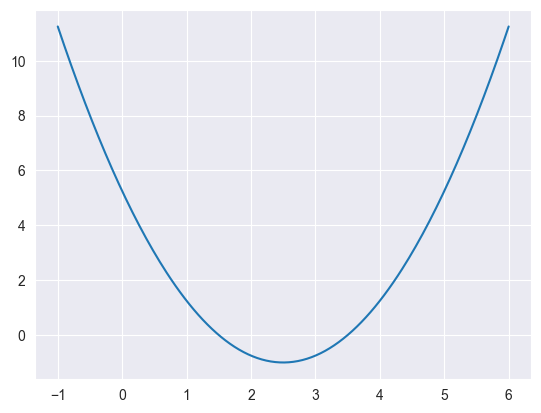

In [7]:
# Plot image and data visualization
plt.plot(x_arr, y_arr)
plt.show()

19:41:51 - SUCCESS - theta is 2.4999580569599997, f(x) = -0.9999999982407813, the counter is 12.


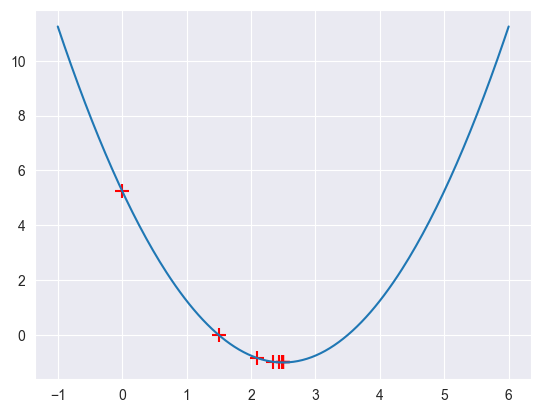

In [8]:
learn_rate, _theta, epsilon = 0.3, 0, 1e-8
theta_history = []
i = 0  # Counter
while True:
    i += 1
    gradient = f_x_1_diff_fcn(_theta)
    last_theta = _theta
    theta_history.append(last_theta)
    _theta = _theta - learn_rate * gradient

    if abs(f_x_fcn(last_theta) - f_x_fcn(_theta)) < epsilon:
        hues.success(f'theta is {_theta}, f(x) = {f_x_fcn(_theta)}, the counter is {i}.')
        break

# Plot image and data visualization
plt.plot(x_arr, y_arr)
plt.scatter(theta_history, f_x_fcn(np.array(theta_history)), s=100, color='r', marker='+')
plt.show()

In [9]:
def plot_theta_history(x, y, theta_his, ax):
    ax.plot(x, y)
    # plt.plot(theta_his, get_y(np.array(theta_his)),markersize=10, color='r', marker='+')
    arrow_x = np.array(theta_his)
    arrow_y = get_y(np.array(theta_his))
    for i in range(1, len(arrow_x)):
        arrow_x_len = arrow_x[i] - arrow_x[i - 1]
        arrow_y_len = arrow_y[i] - arrow_y[i - 1]
        ax.arrow(
            arrow_x[i - 1],
            arrow_y[i - 1],
            arrow_x_len,
            arrow_y_len,
            head_width=0.2,
            head_length=0.1,
            shape="full",
            fc='red',  # header color
            ec='red',  # line color
            alpha=0.9,
            overhang=0.5)

19:41:51 - SUCCESS - theta is 0.4573179827811328, f(x) = 3.172549823469341, the counter is 10.
19:41:51 - SUCCESS - theta is 2.2315645440000003, f(x) = -0.9279424059620722, the counter is 10.
19:41:51 - SUCCESS - theta is 2.484883456, f(x) = -0.9997714900974961, the counter is 10.
19:41:51 - SUCCESS - theta is -12.979341056000022, f(x) = 238.60999952796786, the counter is 10.


<Figure size 1280x960 with 0 Axes>

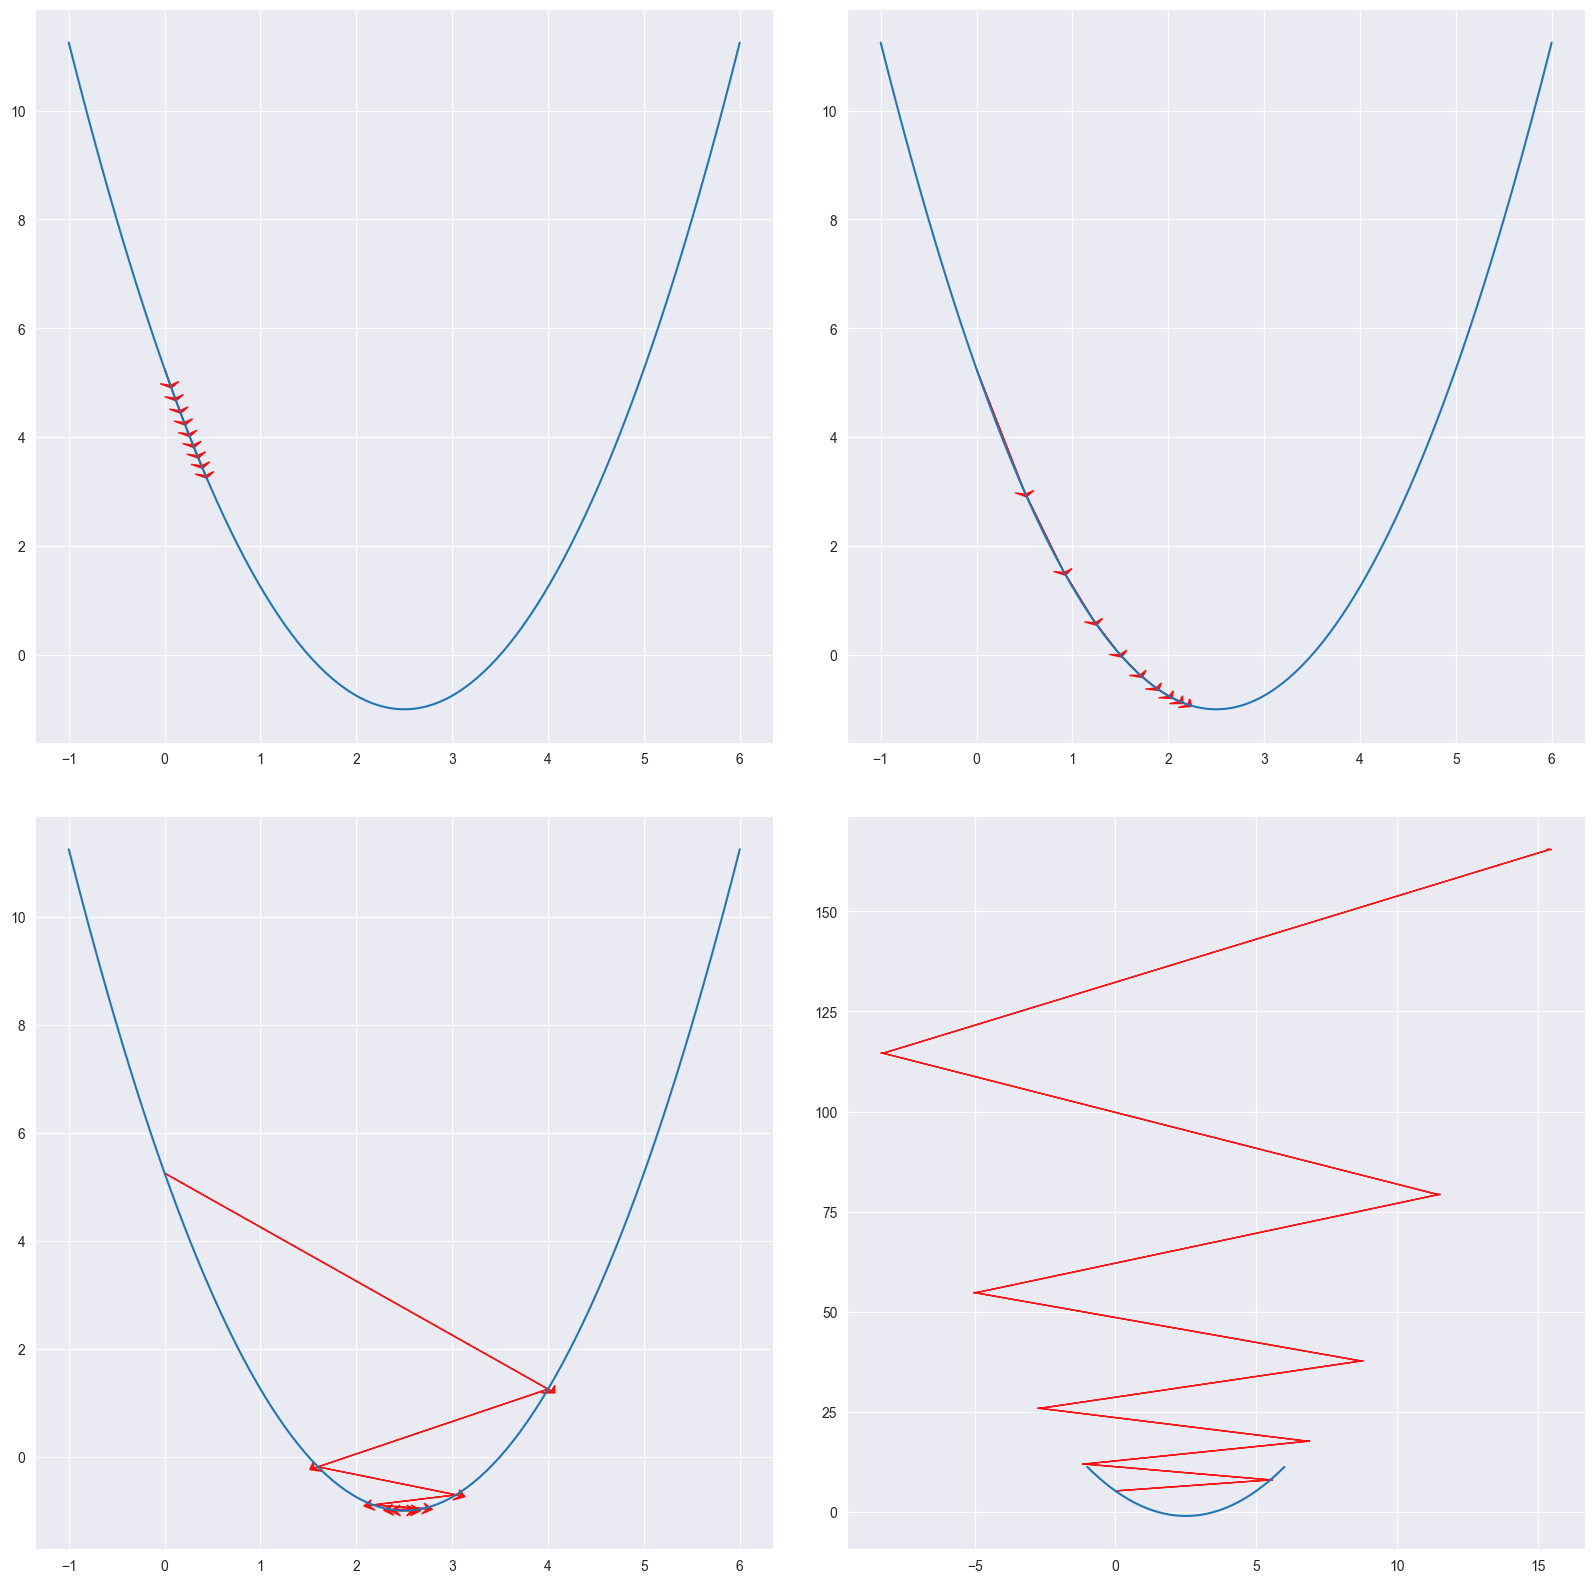

In [10]:
eta_list = [0.01, 0.1, 0.8, 1.1]
epsilon = 1e-8

# 绘制标准曲线
plt.figure(dpi=200)
# # plt.style.use('dark_background')
fig, ax_arr = plt.subplots(2, 2, figsize=(20, 20))  # sharex、y设置子图共享x、y轴坐标
fig.subplots_adjust(hspace=0.1, wspace=0.1)  # 设置子图的横纵间距

for i, eta in enumerate(eta_list):

    # 计算当前图形行列号
    row_num = i // 2
    col_num = i - row_num * 2
    cur_ax = ax_arr[row_num][col_num]

    j = 0  # Counter
    theta_his = []
    _theta = 0

    while True:
        j += 1
        gradient = f_x_1_diff_fcn(_theta)
        last_theta = _theta
        theta_his.append(_theta)
        _theta = _theta - eta * gradient

        if (abs(f_x_fcn(last_theta) - f_x_fcn(_theta)) < epsilon) or (j >= 10):
            hues.success(f'theta is {_theta}, f(x) = {f_x_fcn(_theta)}, the counter is {j}.')
            plot_theta_history(x_arr, y_arr, theta_his, cur_ax)
            # cur_ax.plot(x_arr, y_arr)
            # cur_ax.scatter(theta_his, f_x_fcn(np.array(theta_his)), s=100, color='r', marker='+')
            break


def plot_theta_history(ax, x, y, theta_his):
    ax.plot(x, y)
    # plt.plot(theta_his, get_y(np.array(theta_his)),markersize=10, color='r', marker='+')
    arrow_x = np.array(theta_his)
    arrow_y = get_y(np.array(theta_his))
    for i in range(1, len(arrow_x)):
        arrow_x_len = arrow_x[i] - arrow_x[i - 1]
        arrow_y_len = arrow_y[i] - arrow_y[i - 1]
        plt.arrow(
            arrow_x[i - 1],
            arrow_y[i - 1],
            arrow_x_len,
            arrow_y_len,
            head_width=0.2,
            head_length=0.1,
            shape="full",
            fc='red',  # header color
            ec='red',  # line color
            alpha=0.9,
            overhang=0.5)
    # plt.show()

## Using gradient descent in linear regression

In [11]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
X = x.reshape(-1, 1)

y = x * 3 + 4 + np.random.normal(size=100)

In [12]:
X.shape, y.shape

((100, 1), (100,))

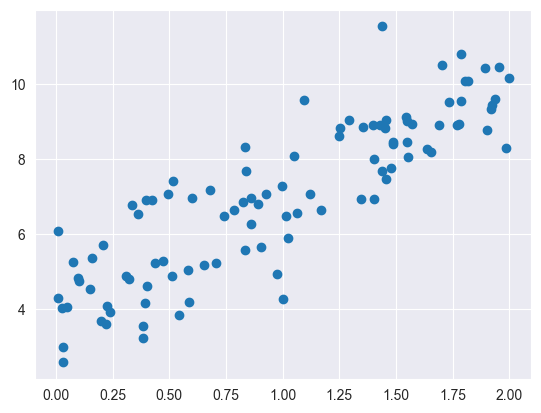

In [13]:
plt.scatter(x, y)

![image-20230521184500866](https://image.manyacan.com/202305211845918.png-wm04)

In [14]:
# Define loss function
def loss_fun(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta) ** 2)) / len(X_b)
    except:
        hues.error('The return value is to large!!!')
        return np.inf


# Define the Find the derivative function
def get_der(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])

    return res * 2 / len(X_b)


def gradient_descent(X_b, y, ini_theta, eta, n_iters=1e4, eps=1e-8):
    theta = ini_theta
    i = 0
    theta_history.append(ini_theta)

    while i < n_iters:
        gradient = get_der(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if abs(loss_fun(theta, X_b, y) - loss_fun(last_theta, X_b, y)) < eps:
            break

        i += 1

    return theta

In [15]:
X_b = np.hstack([np.ones([len(X), 1]), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.001

b, a = gradient_descent(X_b, y, initial_theta, eta)  # y = 3x + 4
b, a

(3.9946613793913204, 3.029663997668306)

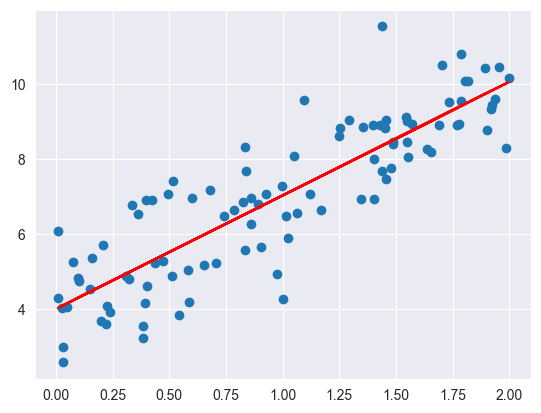

In [16]:
plt.scatter(x, y)
plt.plot(x, x * a + b, color='r')

## Optimizing Gradient Descent Using Vectorization